<a href="https://colab.research.google.com/github/UninaLabs-EO/Detectron2/blob/main/ICEVISION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# Choose your installation target: cuda11 or cuda10 or cpu
!bash icevision_install.sh cuda10


--2022-03-07 10:13:04--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2691 (2.6K) [text/plain]
Saving to: ‘icevision_install.sh.1’

icevision_install.s 100%[===================>]   2.63K  --.-KB/s    in 0s      

2022-03-07 10:13:04 (45.3 MB/s) - ‘icevision_install.sh.1’ saved [2691/2691]

Installing icevision + dependencices for cuda10
- Installing torch and its dependencies
- Installing mmcv
- Installing mmdet
- Installing icevision from PyPi
- Installing icedata from PyPi
icevision installation finished!


In [2]:
!pip install pillow==8.2.0

In [3]:
# Restart kernel after installation
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'restart': True, 'status': 'ok'}

In [1]:
from icevision.all import *

INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:18


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from pathlib import Path
coco_dir = Path('/content/drive/MyDrive/DATASET/data')

In [4]:
# Create the parser
trainParser = parsers.COCOBBoxParser(coco_dir / "Annotations/train.json", coco_dir / "Immagini_train")

In [5]:
# Parse annotations to create records
train_records, valid_records = trainParser.parse()
trainParser.class_map

  0%|          | 0/702 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/389 [00:00<?, ?it/s]

<ClassMap: {'background': 0, 'Wake': 1}>

In [6]:
train_records.get_by_record_id(
record_id=99
)

BaseRecord

common: 
	- Record ID: 99
	- Image size ImgSize(width=1121, height=732)
	- Filepath: /content/drive/MyDrive/DATASET/data/Immagini_train/99.png
	- Img: None
detection: 
	- Areas: [19908]
	- Class Map: <ClassMap: {'background': 0, 'Wake': 1}>
	- Labels: [1]
	- Is Crowds: [0]
	- BBoxes: [<BBox (xmin:664, ymin:125, xmax:901, ymax:209)>]

In [11]:
# Transforms: DATA AUGMENTATION.
# size is set to 384 because EfficientDet requires its inputs to be divisible by 128
image_size = 512

# train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=1024), tfms.A.Normalize()])
# valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

train_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size),  tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size),  tfms.A.Normalize()])

In [12]:
# Datasets
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

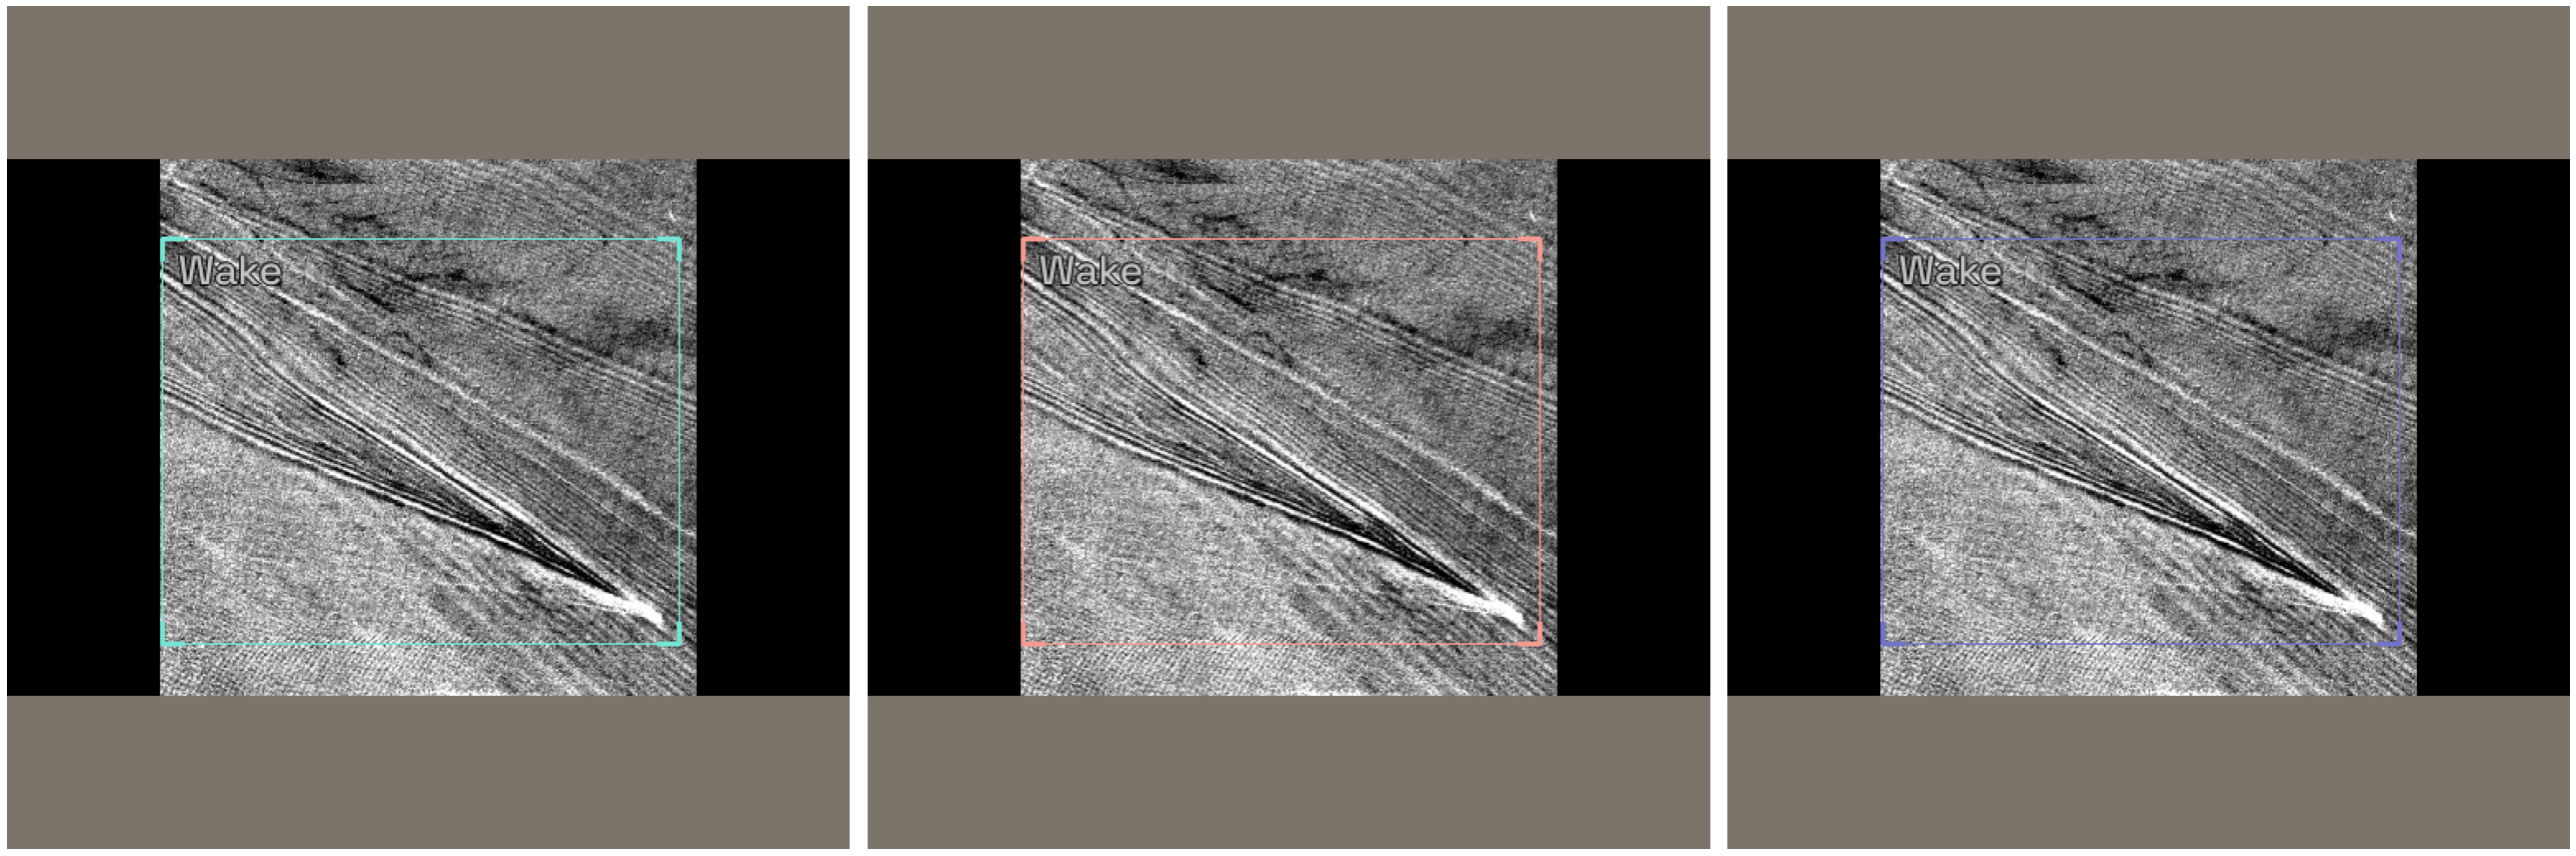

In [13]:
# Show an element of the train_ds with augmentation transformations applied
samples = [train_ds[0] for _ in range(3)]
show_samples(samples, ncols=3)

In [14]:
model_type = models.mmdet.vfnet
backbone = model_type.backbones.resnet50_fpn_1x(pretrained=True)

In [17]:
# Just change the value of selection to try another model

selection = 0

extra_args = {}

if selection == 0:
  model_type = models.mmdet.vfnet
  backbone = model_type.backbones.resnet50_fpn_mstrain_2x

if selection == 1:
  model_type = models.mmdet.retinanet
  backbone = model_type.backbones.resnet50_fpn_1x
  # extra_args['cfg_options'] = { 
  #   'model.bbox_head.loss_bbox.loss_weight': 2,
  #   'model.bbox_head.loss_cls.loss_weight': 0.8,
  #    }

if selection == 2:
  model_type = models.mmdet.faster_rcnn
  backbone = model_type.backbones.resnet101_fpn_2x
  # extra_args['cfg_options'] = { 
  #   'model.roi_head.bbox_head.loss_bbox.loss_weight': 2,
  #   'model.roi_head.bbox_head.loss_cls.loss_weight': 0.8,
  #    }

if selection == 3:
  model_type = models.mmdet.ssd
  backbone = model_type.backbones.ssd300

if selection == 4:
  model_type = models.mmdet.yolox
  backbone = model_type.backbones.yolox_s_8x8

if selection == 5:
  model_type = models.mmdet.yolof
  backbone = model_type.backbones.yolof_r50_c5_8x8_1x_coco

if selection == 6:
  model_type = models.mmdet.detr
  backbone = model_type.backbones.r50_8x2_150e_coco

if selection == 7:
  model_type = models.mmdet.deformable_detr
  backbone = model_type.backbones.twostage_refine_r50_16x2_50e_coco

if selection == 8:
  model_type = models.mmdet.fsaf
  backbone = model_type.backbones.x101_64x4d_fpn_1x_coco

if selection == 9:
  model_type = models.mmdet.sabl
  backbone = model_type.backbones.r101_fpn_gn_2x_ms_640_800_coco

if selection == 10:
  model_type = models.mmdet.centripetalnet
  backbone = model_type.backbones.hourglass104_mstest_16x6_210e_coco

elif selection == 11:
  # The Retinanet model is also implemented in the torchvision library
  model_type = models.torchvision.retinanet
  backbone = model_type.backbones.resnet50_fpn

elif selection == 12:
  model_type = models.ross.efficientdet
  backbone = model_type.backbones.tf_lite0
  # The efficientdet model requires an img_size parameter
  extra_args['img_size'] = image_size

elif selection == 13:
  model_type = models.ultralytics.yolov5
  backbone = model_type.backbones.small
  # The yolov5 model requires an img_size parameter
  extra_args['img_size'] = image_size

model_type, backbone, extra_args

(<module 'icevision.models.mmdet.models.vfnet' from '/usr/local/lib/python3.7/dist-packages/icevision/models/mmdet/models/vfnet/__init__.py'>,
 {})

In [18]:
backbone.__dict__

{'config_path': Path('/root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs/vfnet/vfnet_r50_fpn_mstrain_2x_coco.py'),
 'model_name': 'vfnet',
 'weights_url': 'https://openmmlab.oss-cn-hangzhou.aliyuncs.com/mmdetection/v2.0/vfnet/vfnet_r50_fpn_mstrain_2x_coco/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth'}

In [19]:
# Instantiate the model
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(trainParser.class_map), **extra_args) 


  0%|          | 0/131902412 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
2022-03-07 10:18:03,007 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2022-03-07 10:18:03,009 - mmcv - INFO - load model from: torchvision://resnet50
2022-03-07 10:18:03,012 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

2022-03-07 10:18:03,691 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-03-07 10:18:03,725 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-03-07 10:18:03,761 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'vfnet_cls', 'std': 0.01, 'bias_prob': 0.01}}
2022-03-07 10:18:03,808 - mmcv - INFO - 
backbone.conv1.weight - torch.Size([64, 3, 7, 7]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 10:18:03,811 - mmcv - INFO - 
backbone.bn1.weight - torch.Size([64]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 10:18:03,813 - mmcv - INFO - 
backbone.bn1.bias - torch.Size([64]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 10:18:03,815 - mmcv - INFO - 
backbone.layer1.0.conv1.weight - torch.Size([64, 

load checkpoint from local path: checkpoints/vfnet/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.vfnet_cls.weight: copying a param with shape torch.Size([80, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([1, 256, 3, 3]).
size mismatch for bbox_head.vfnet_cls.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([1]).


In [20]:
# Data Loaders
train_dl = model_type.train_dl(train_ds, batch_size=32, num_workers=2, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=8, num_workers=2, shuffle=False)

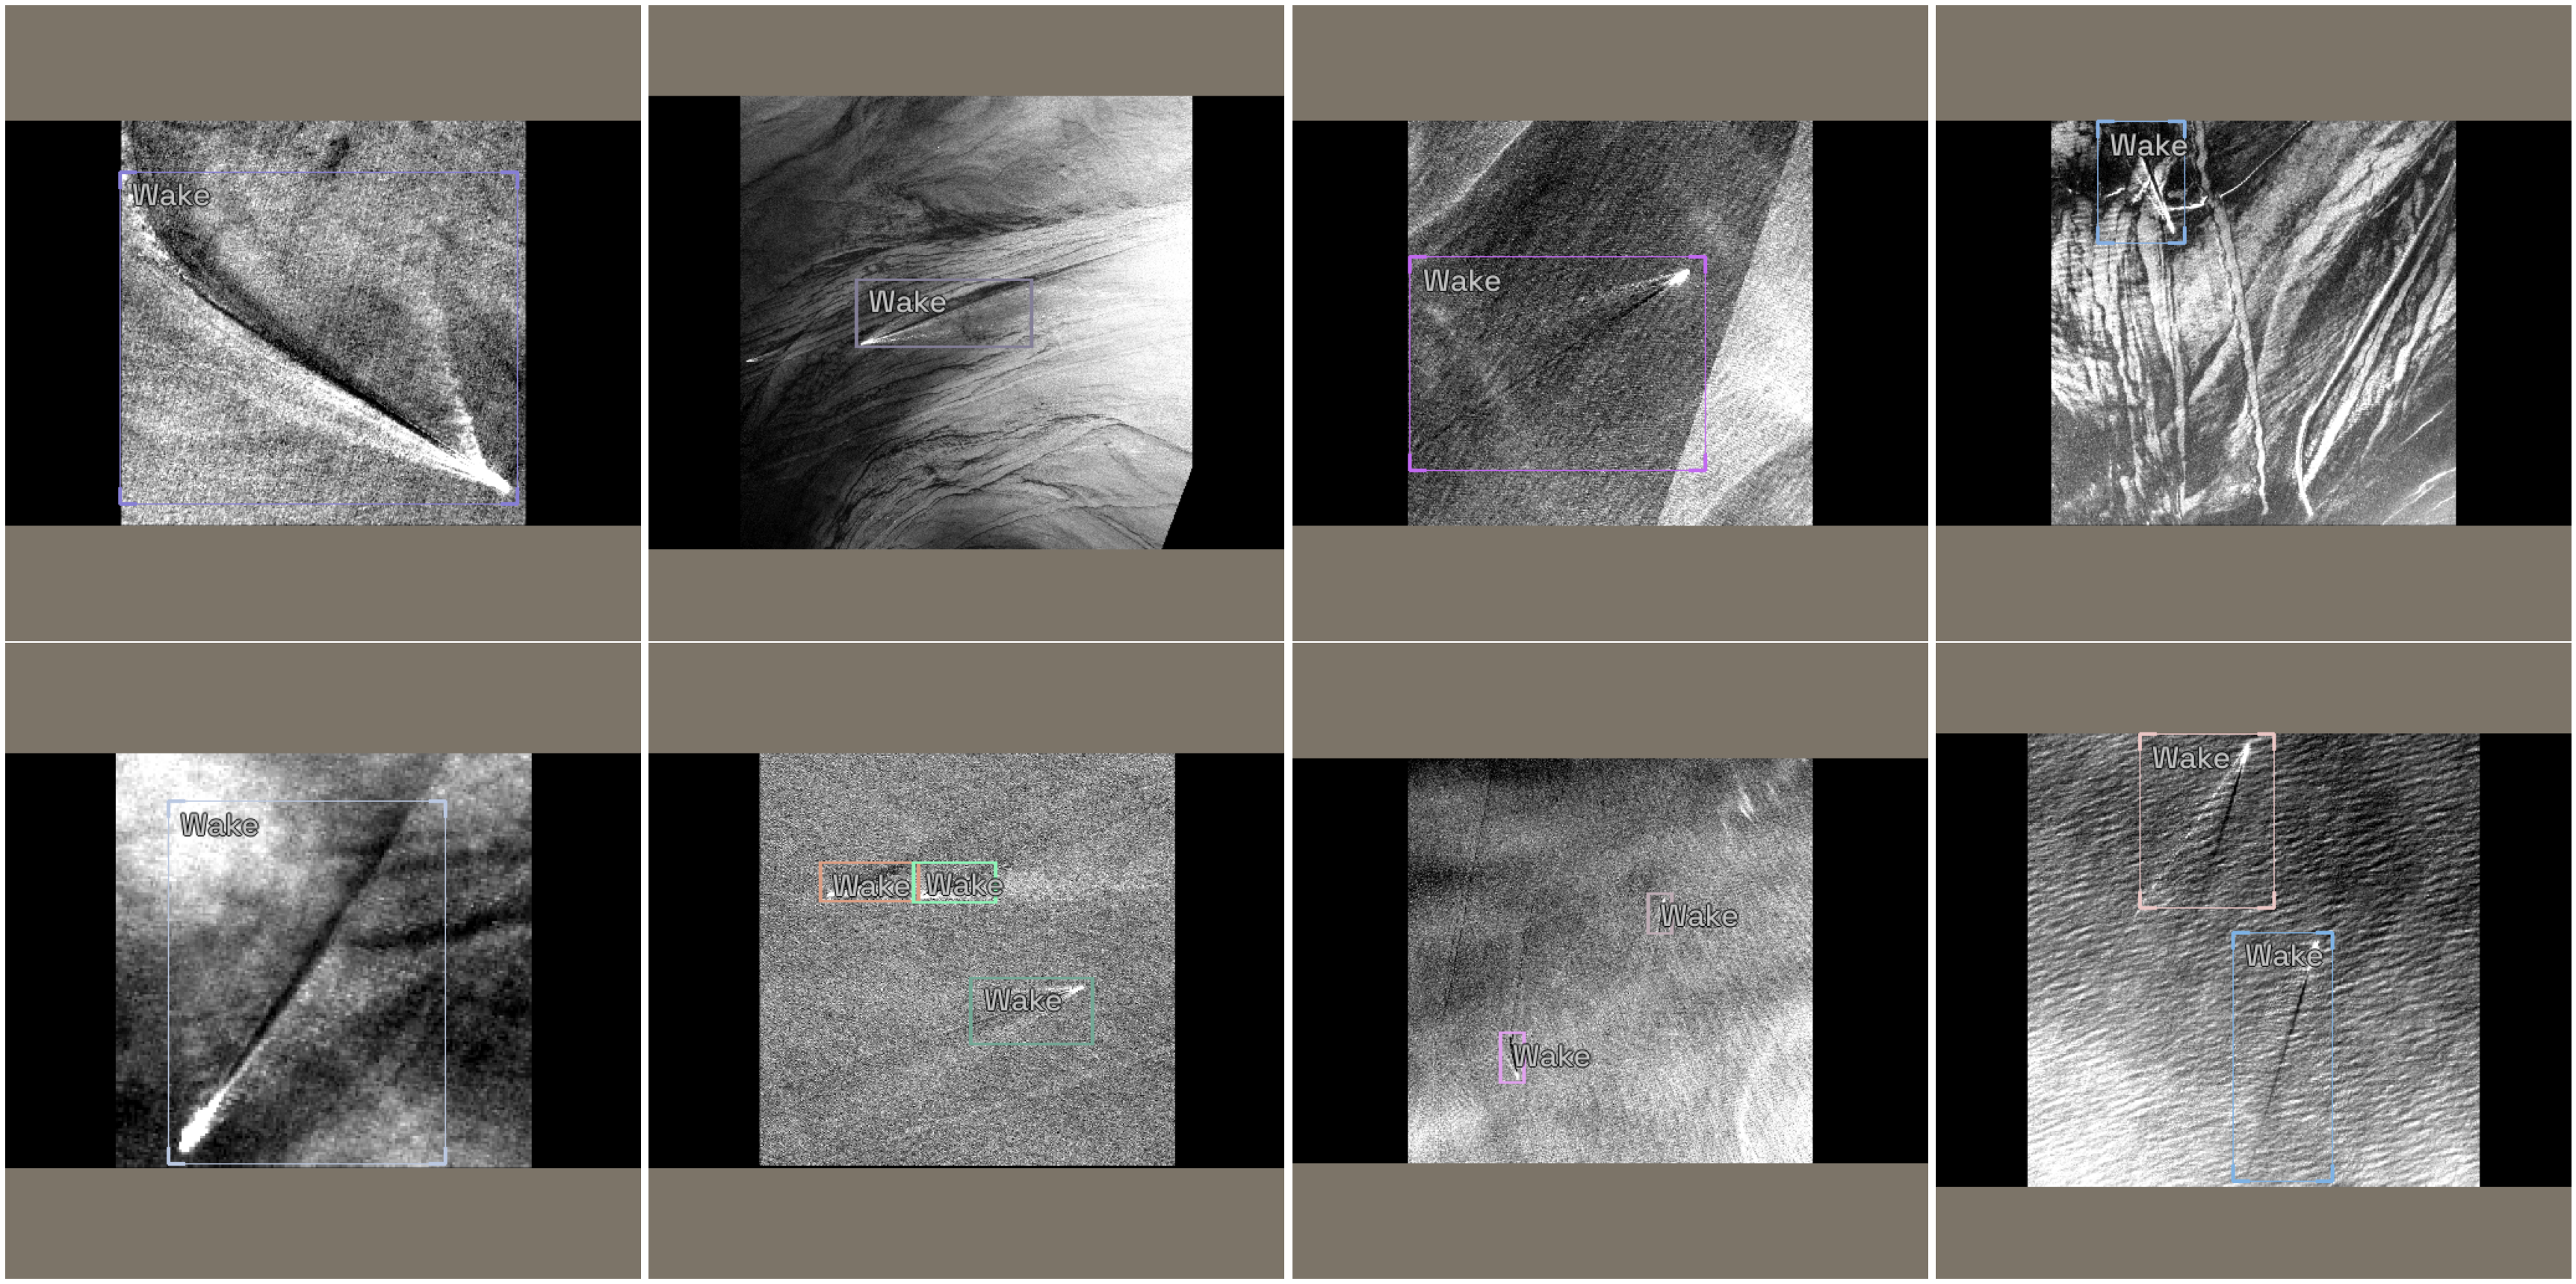

In [21]:
# show batch
model_type.show_batch(first(valid_dl), ncols=4)

In [22]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

Training using fastai

In [23]:
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

In [ ]:
learn.lr_find()

# For Sparse-RCNN, use lower `end_lr`
# learn.lr_find(end_lr=0.005)

In [ ]:
learn.fine_tune(200, 1e-4, freeze_epochs=1)

In [38]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=8, shuffle=False)
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)

  0%|          | 0/10 [00:00<?, ?it/s]

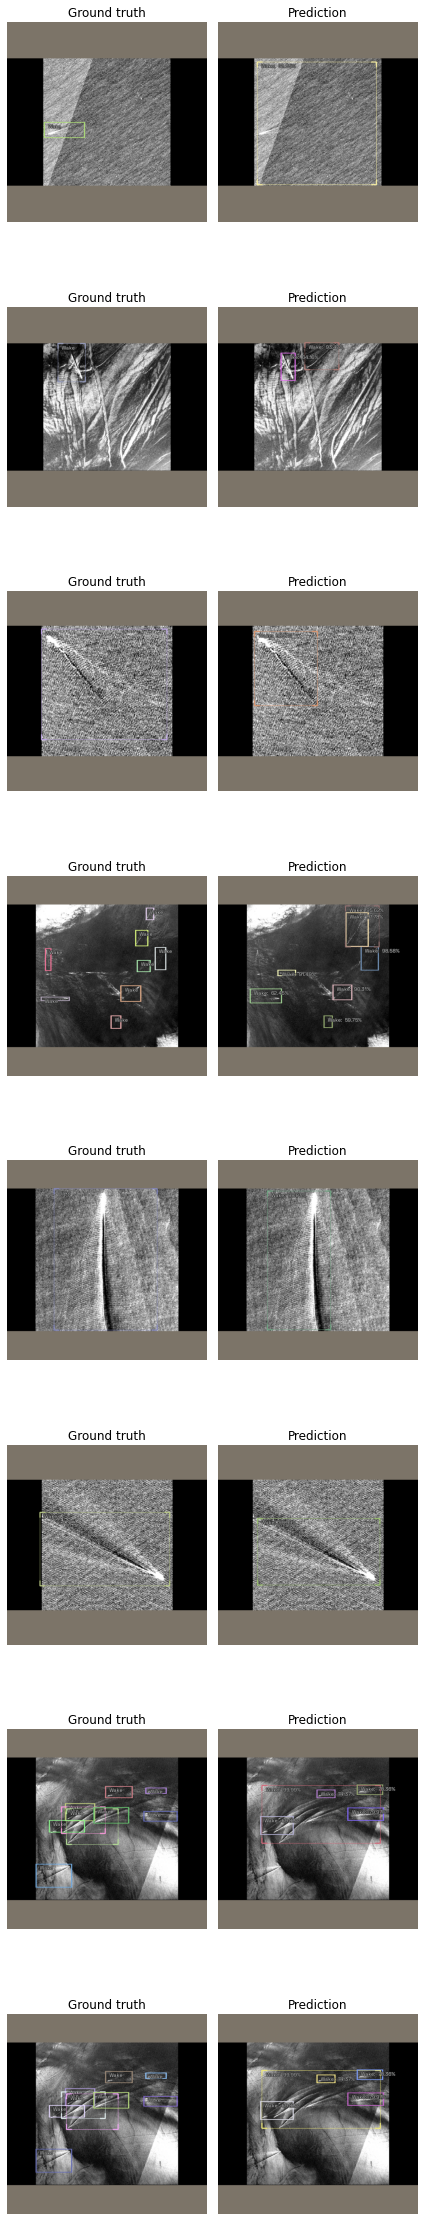

In [41]:
model_type.show_results(model, valid_ds, detection_threshold=.5, num_samples=8)

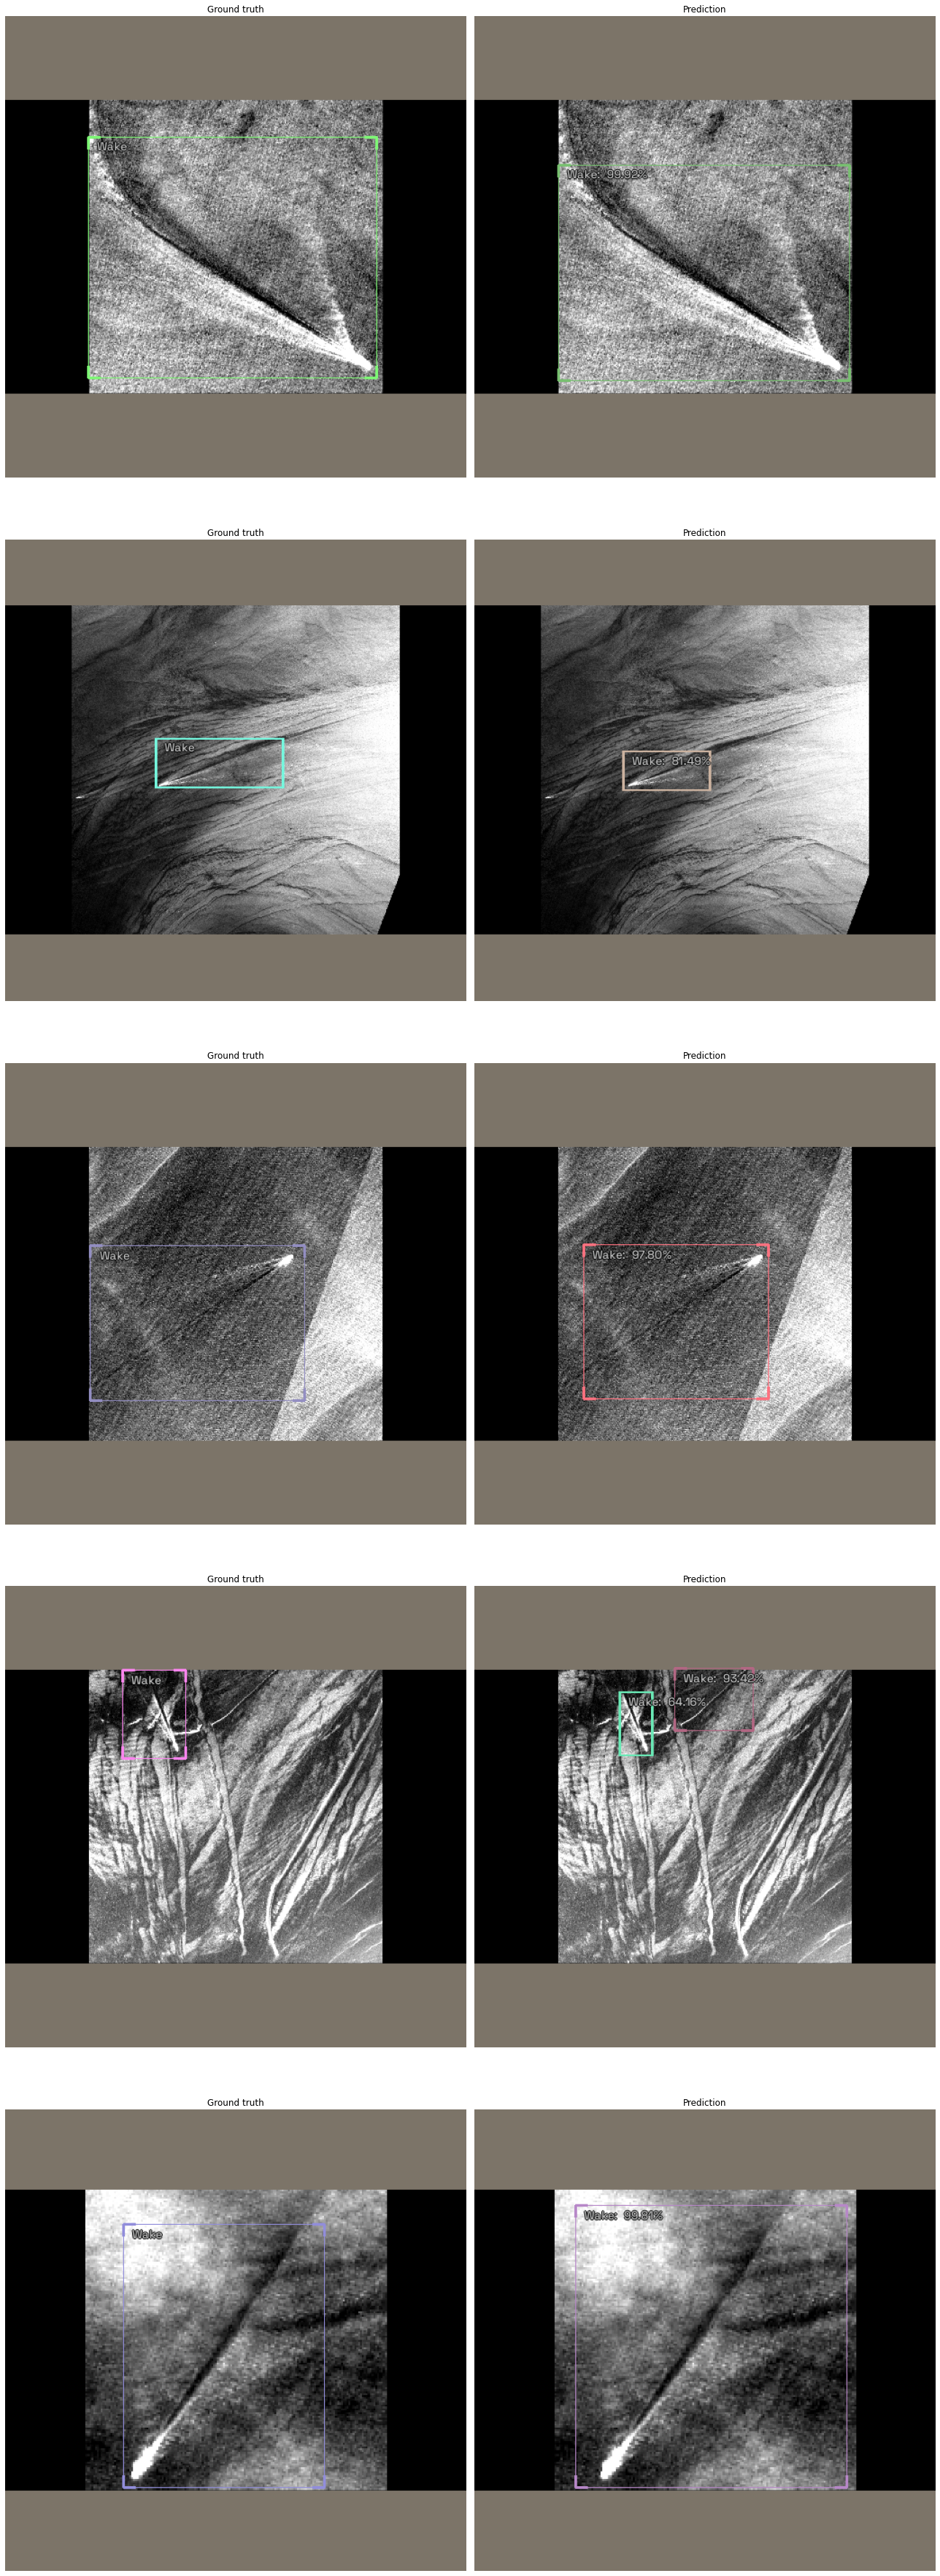

In [42]:
n = 5
show_preds(preds=preds[:n], figsize=(18,10*n))